<a href="https://colab.research.google.com/github/AmirAzz/Test/blob/main/yolo8s_10epoch_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi


Tue Apr  4 11:44:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow -q

from roboflow import Roboflow
rf = Roboflow(api_key="vi4sAIgCTFi0H4tZwvA4")
project = rf.workspace("kios-alpsc").project("rescuenet-yolo8")
dataset = project.version(2).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to RescueNet-YOLO8-2 in yolov8:: 100%|██████████| 13358/13358 [00:09<00:00, 1474.69it/s]


In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True 

/content
100% 21.5M/21.5M [00:00<00:00, 338MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/RescueNet-YOLO8-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=

/content


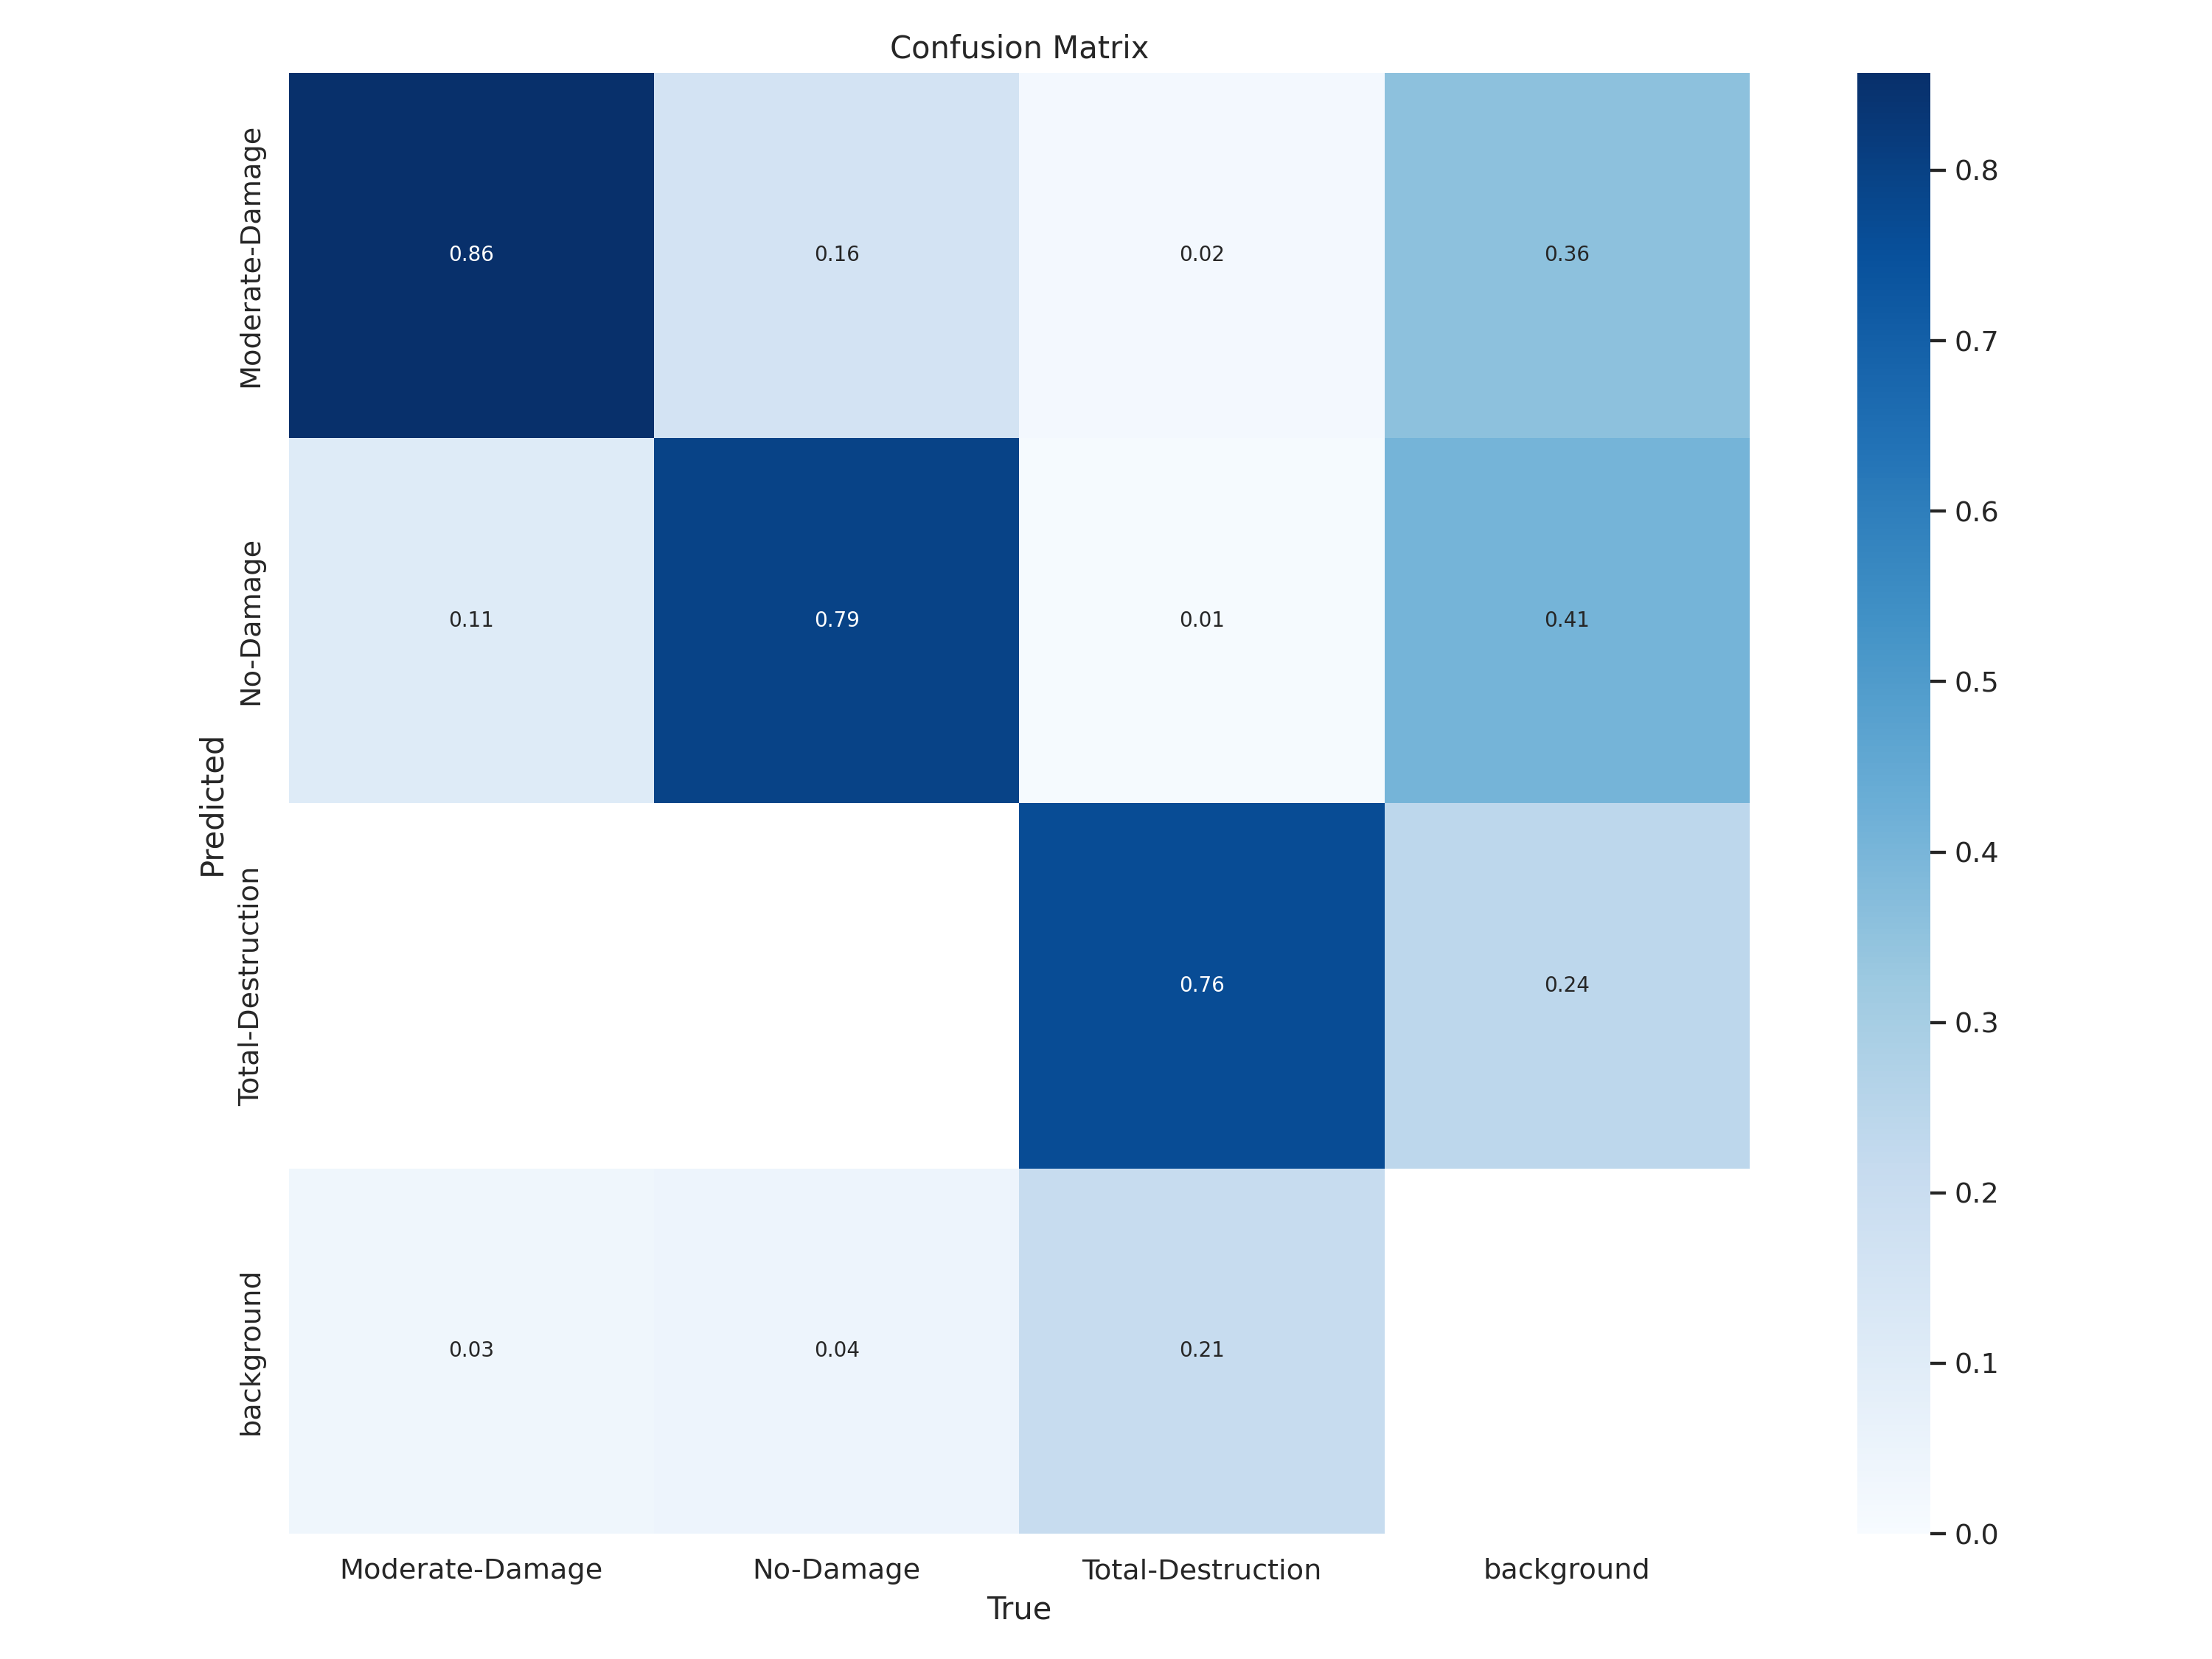

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


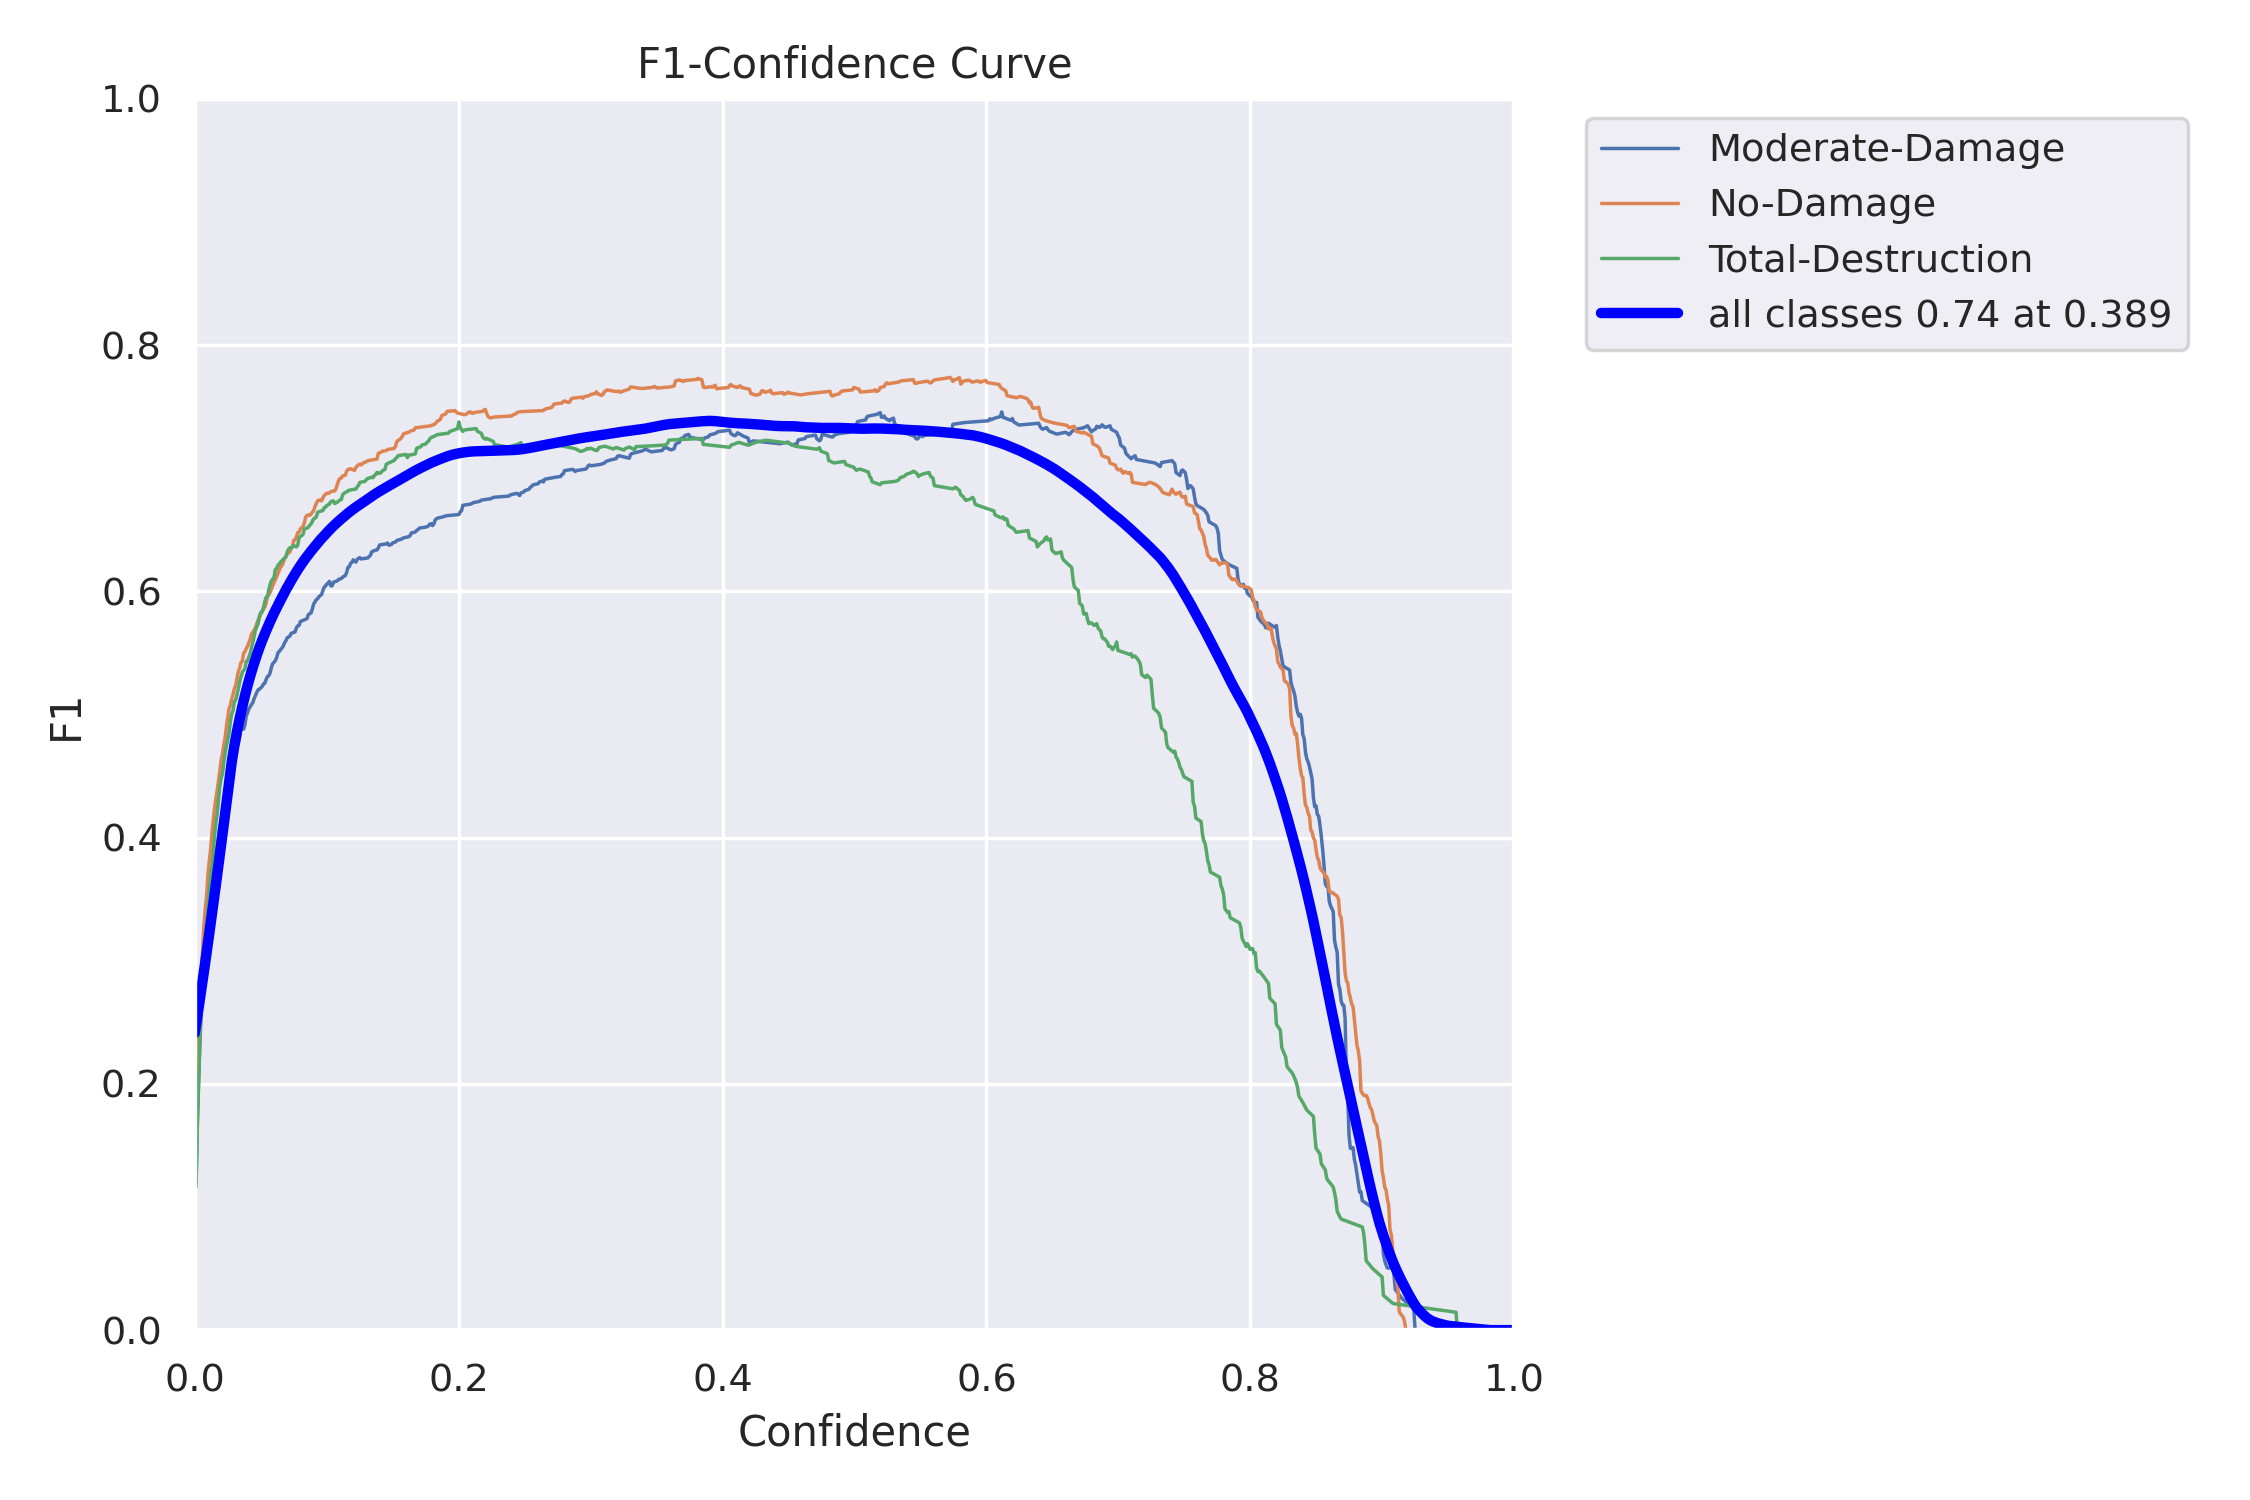

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


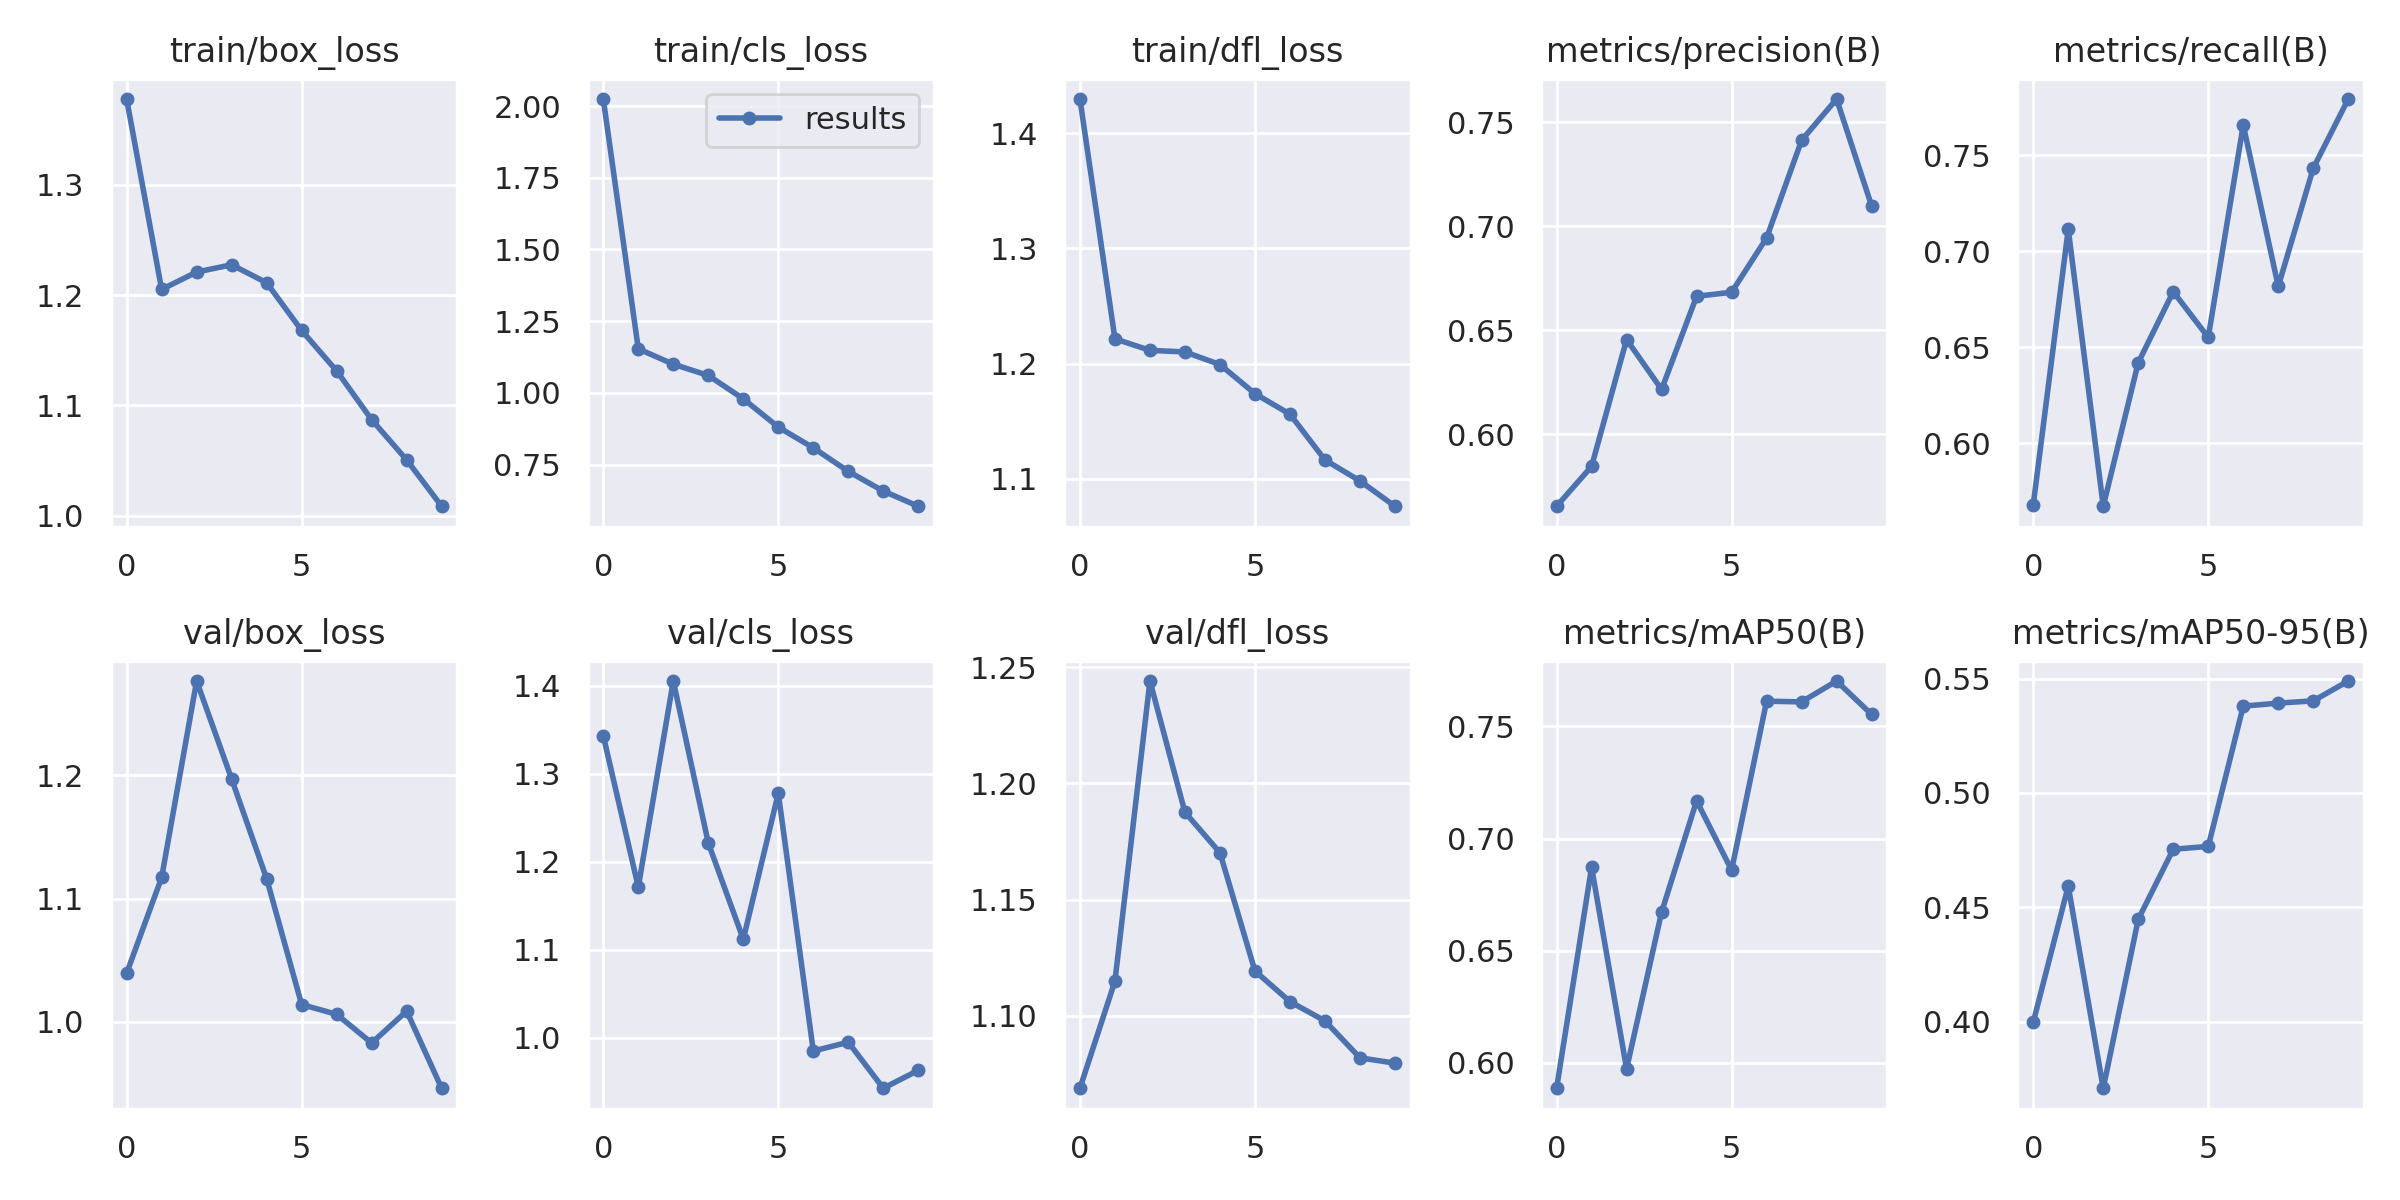

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


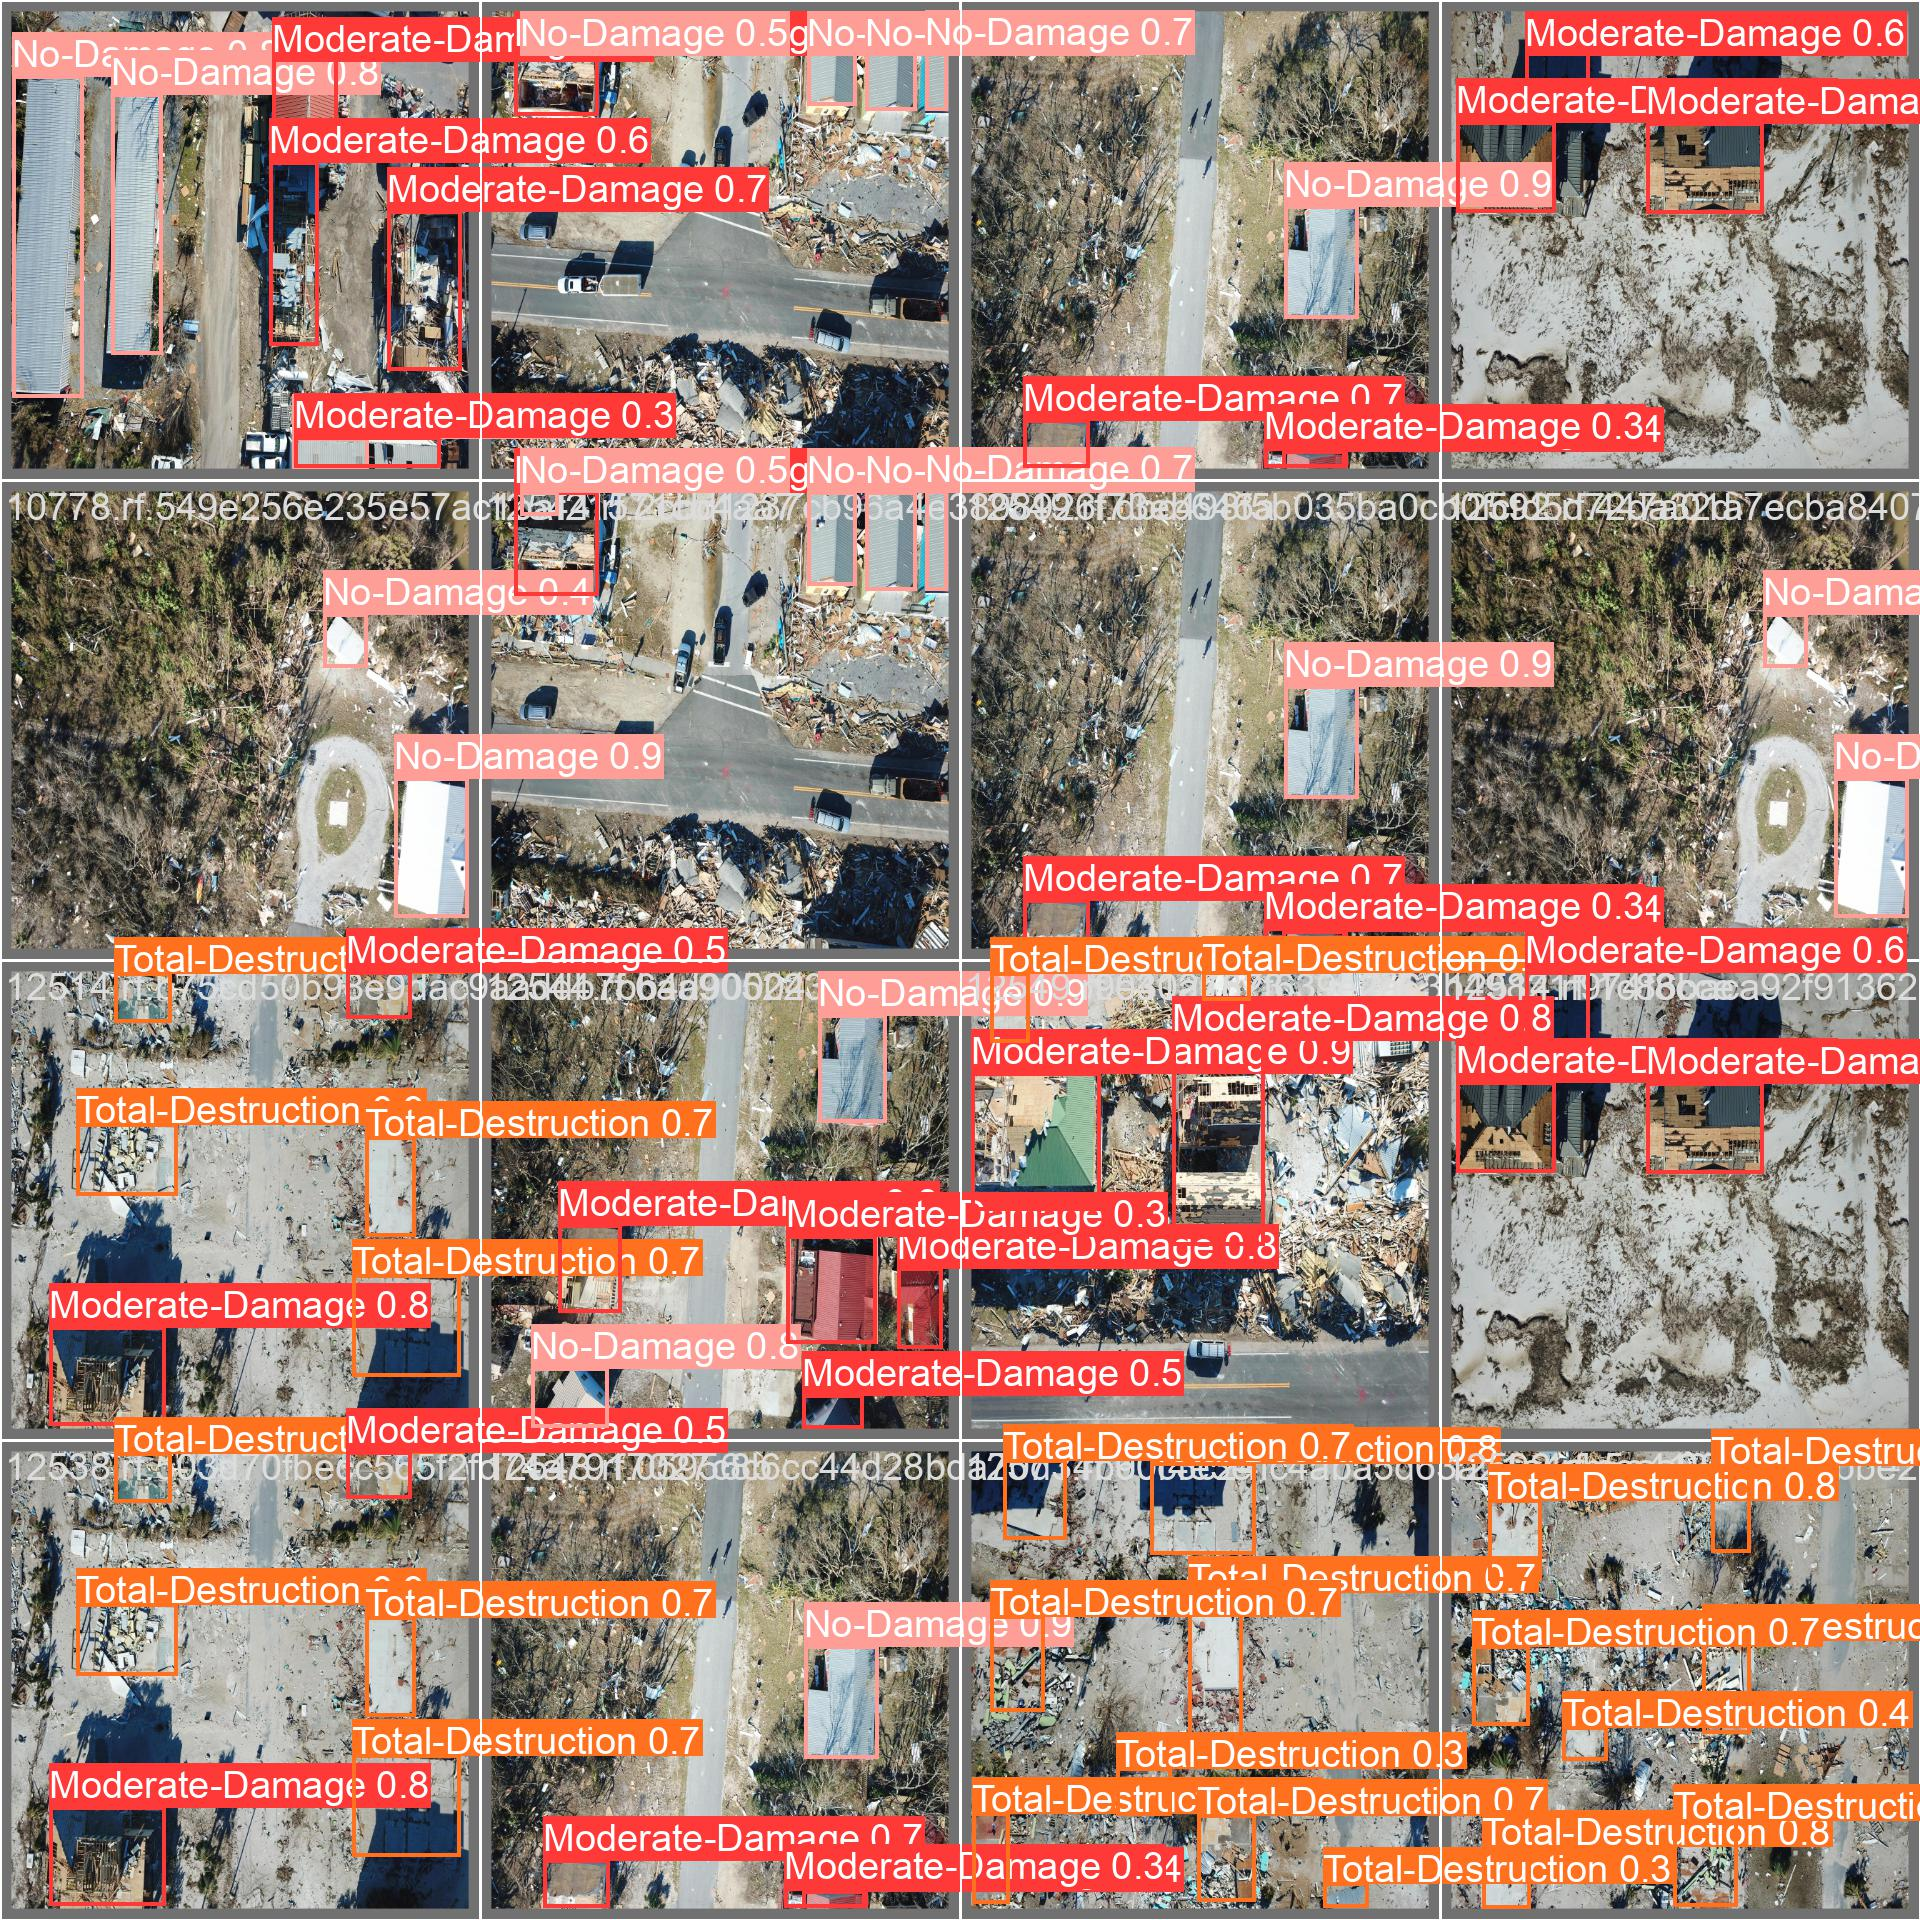

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml save=true

/content
2023-04-04 12:39:51.284780: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 12:39:52.289506: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/RescueNet-YOLO8-2/valid/labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100% 240/240 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:13<00:00,  1.13it/s]
                   all        240        895      0.709       0.78      0.755      0.549
       Moderate-Damage   

In [23]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml save=true

/content
2023-04-04 14:11:37.096422: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 14:11:38.168678: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/RescueNet-YOLO8-2/valid/labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100% 240/240 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:15<00:00,  1.02s/it]
                   all        240        895      0.703      0.751      0.778      0.567
       Moderate-Damage   

In [24]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/film3.mp4 save=True

/content
2023-04-04 14:12:30.799716: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 14:12:31.803853: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/2347) /content/film3.mp4: 384x640 1 Moderate-Damage, 110.9ms
video 1/1 (2/2347) /content/film3.mp4: 384x640 1 Moderate-Damage, 11.2ms
video 1/1 (3/2347) /content/film3.mp4: 384x640 1 Moderate-Damage, 11.1ms
video 1/1 (4/2347) /content/film3.mp4: 384x640 1 Moderate-Damage, 11.1ms
video 1/1 (5/2347) /content/film3.mp4: 384x640 1 Moderate-Damage, 11.1ms
video 1/1 (6/2

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-04-04 12:40:44.822834: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 12:40:45.799322: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/168 /content/datasets/RescueNet-YOLO8-2/test/images/10794.rf.490d66e03fd55a75124aae381875e0da.jpg: 640x640 1 Total-Destruction, 16.3ms
image 2/168 /content/datasets/RescueNet-YOLO8-2/test/images/10794.rf.524115309563d35cb4aa01d697e20a82.jpg: 640x640 1 Total-Destruction, 18.8ms
image 3/168 /content/datasets/RescueNet-YOLO8-2/test/images/10801-Copy.rf.928ef875f23fb04848e2

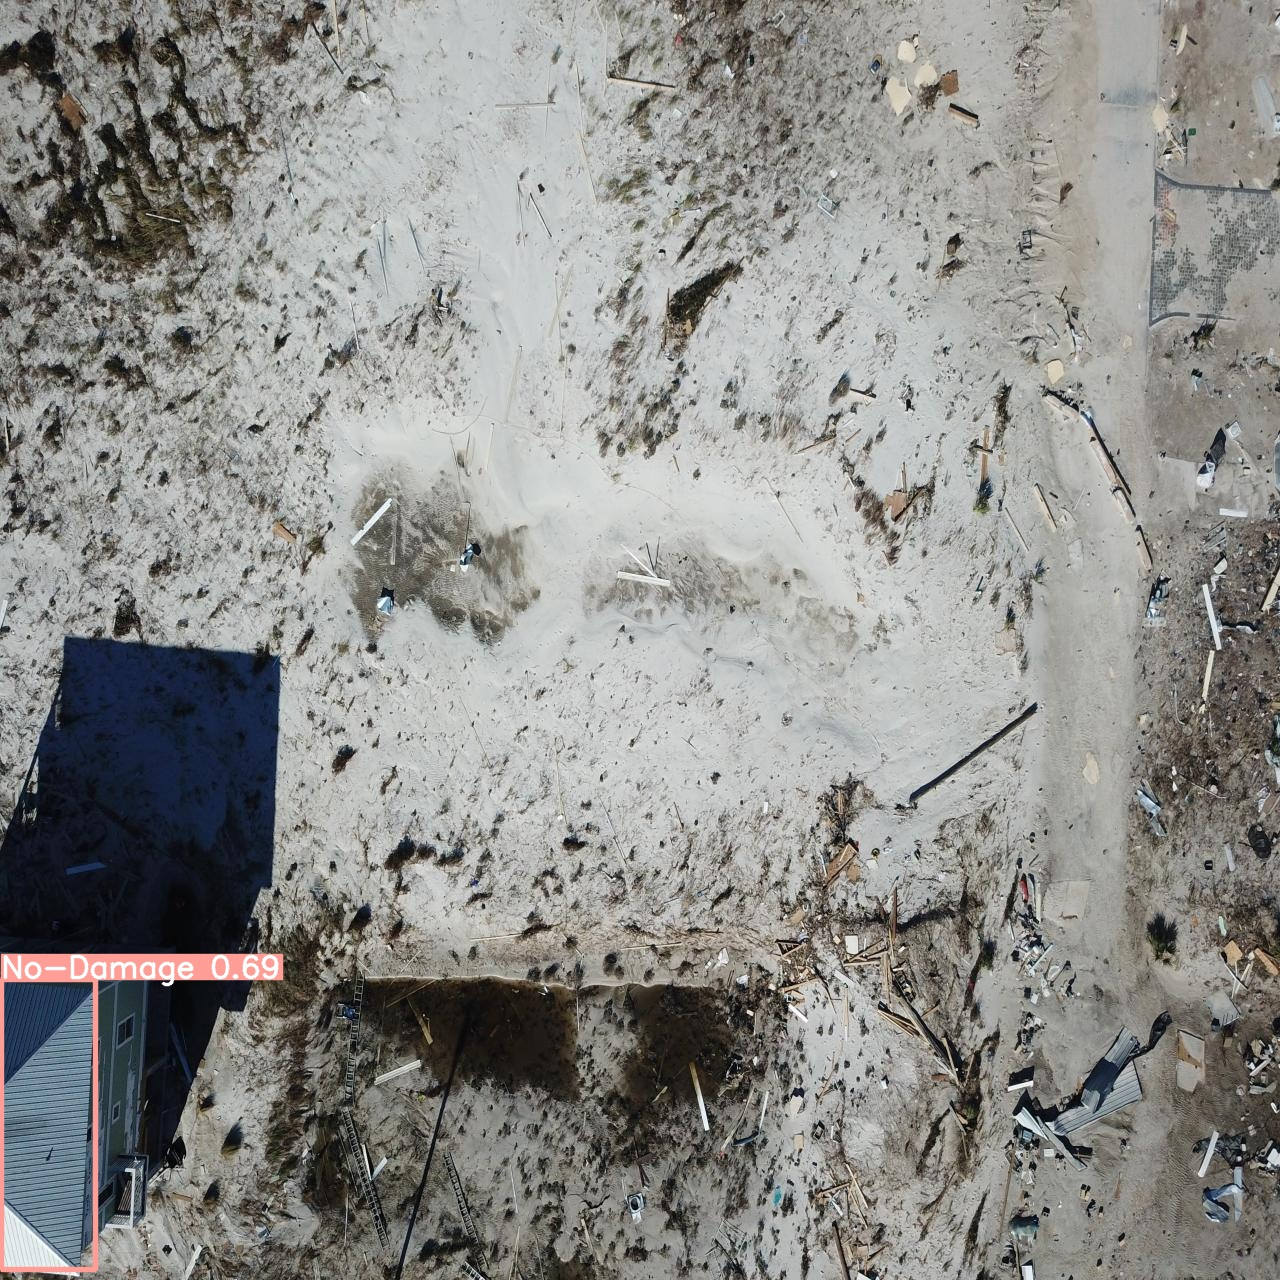

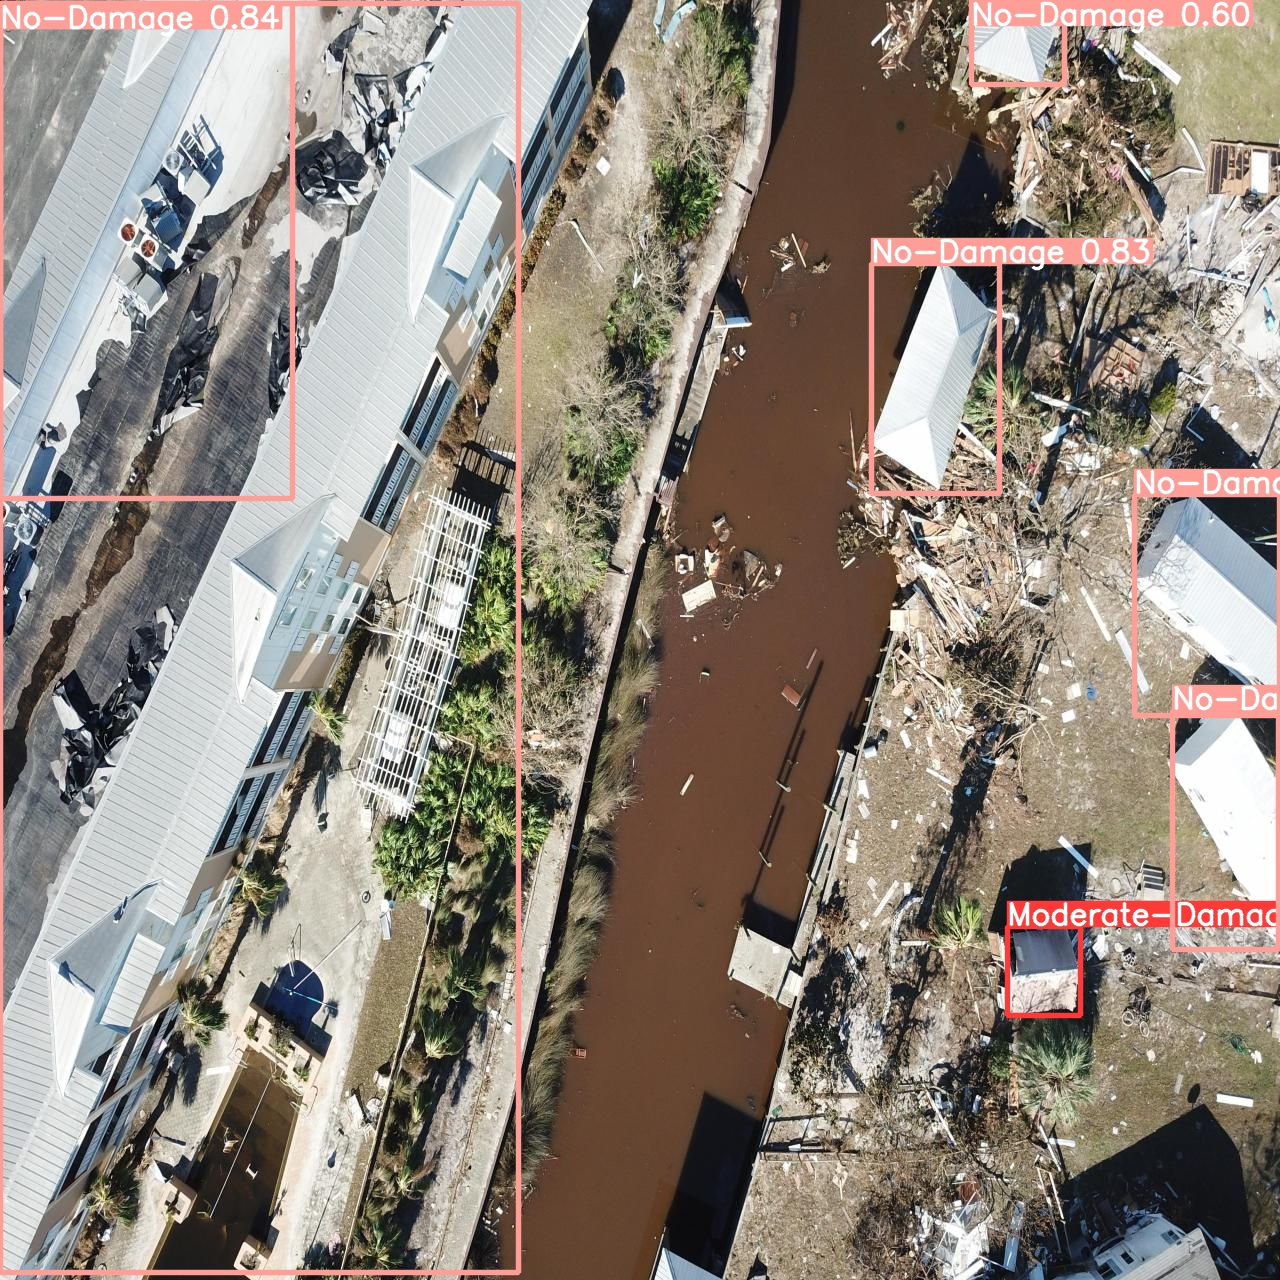

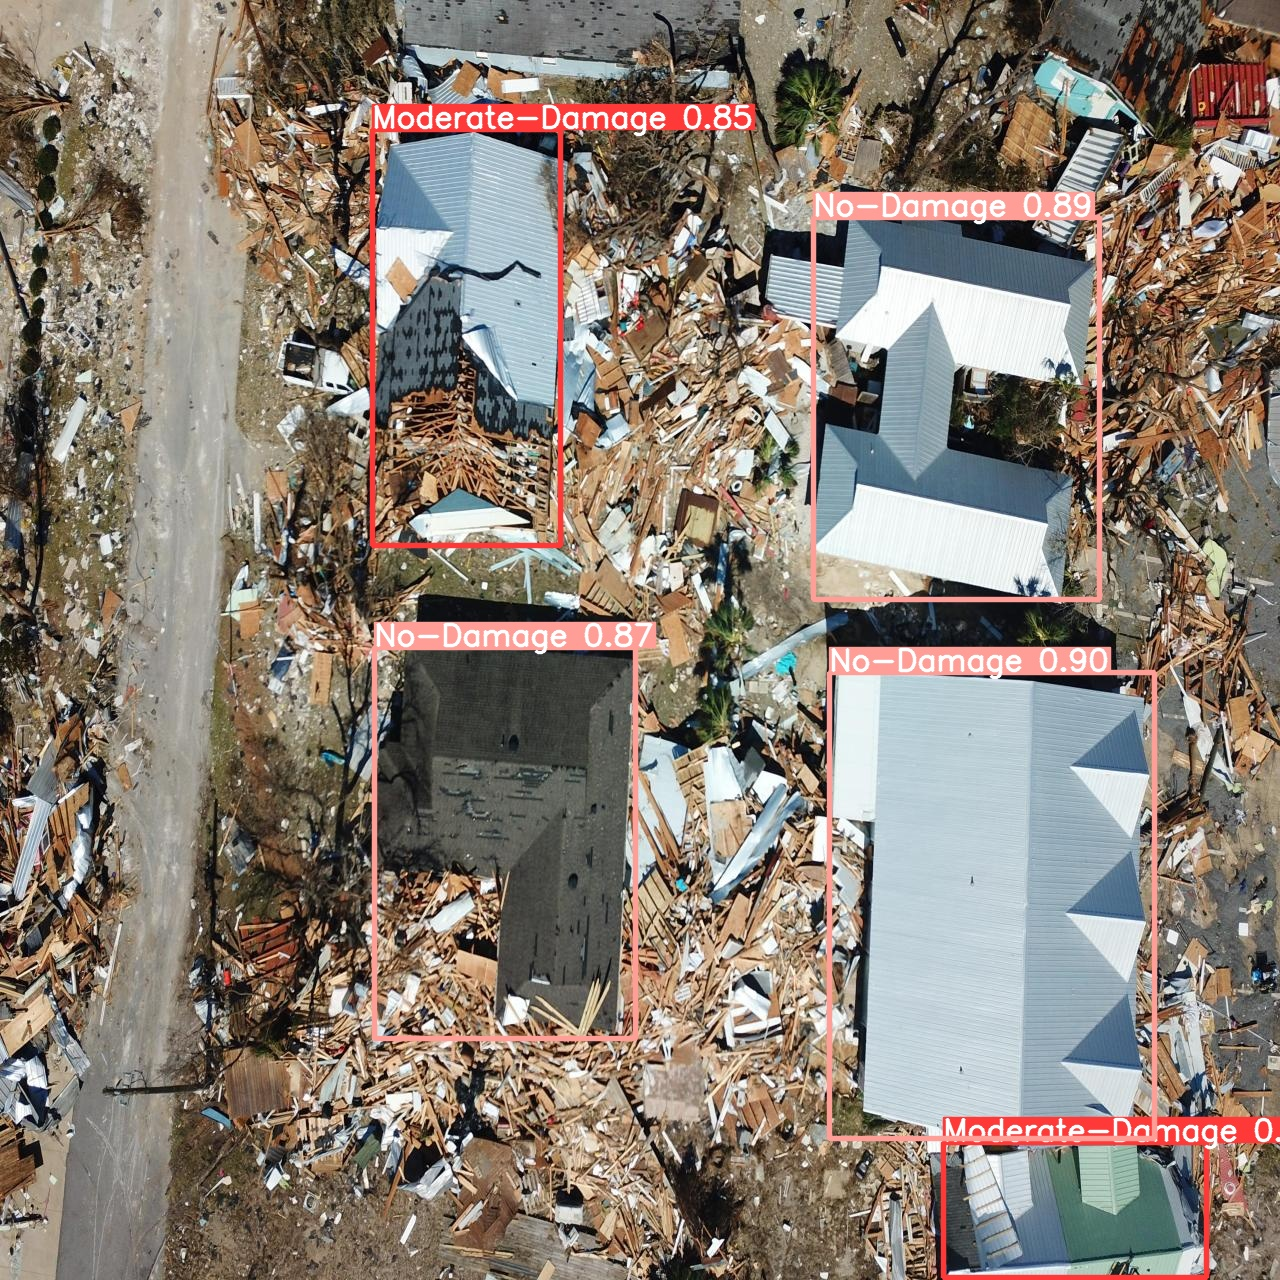

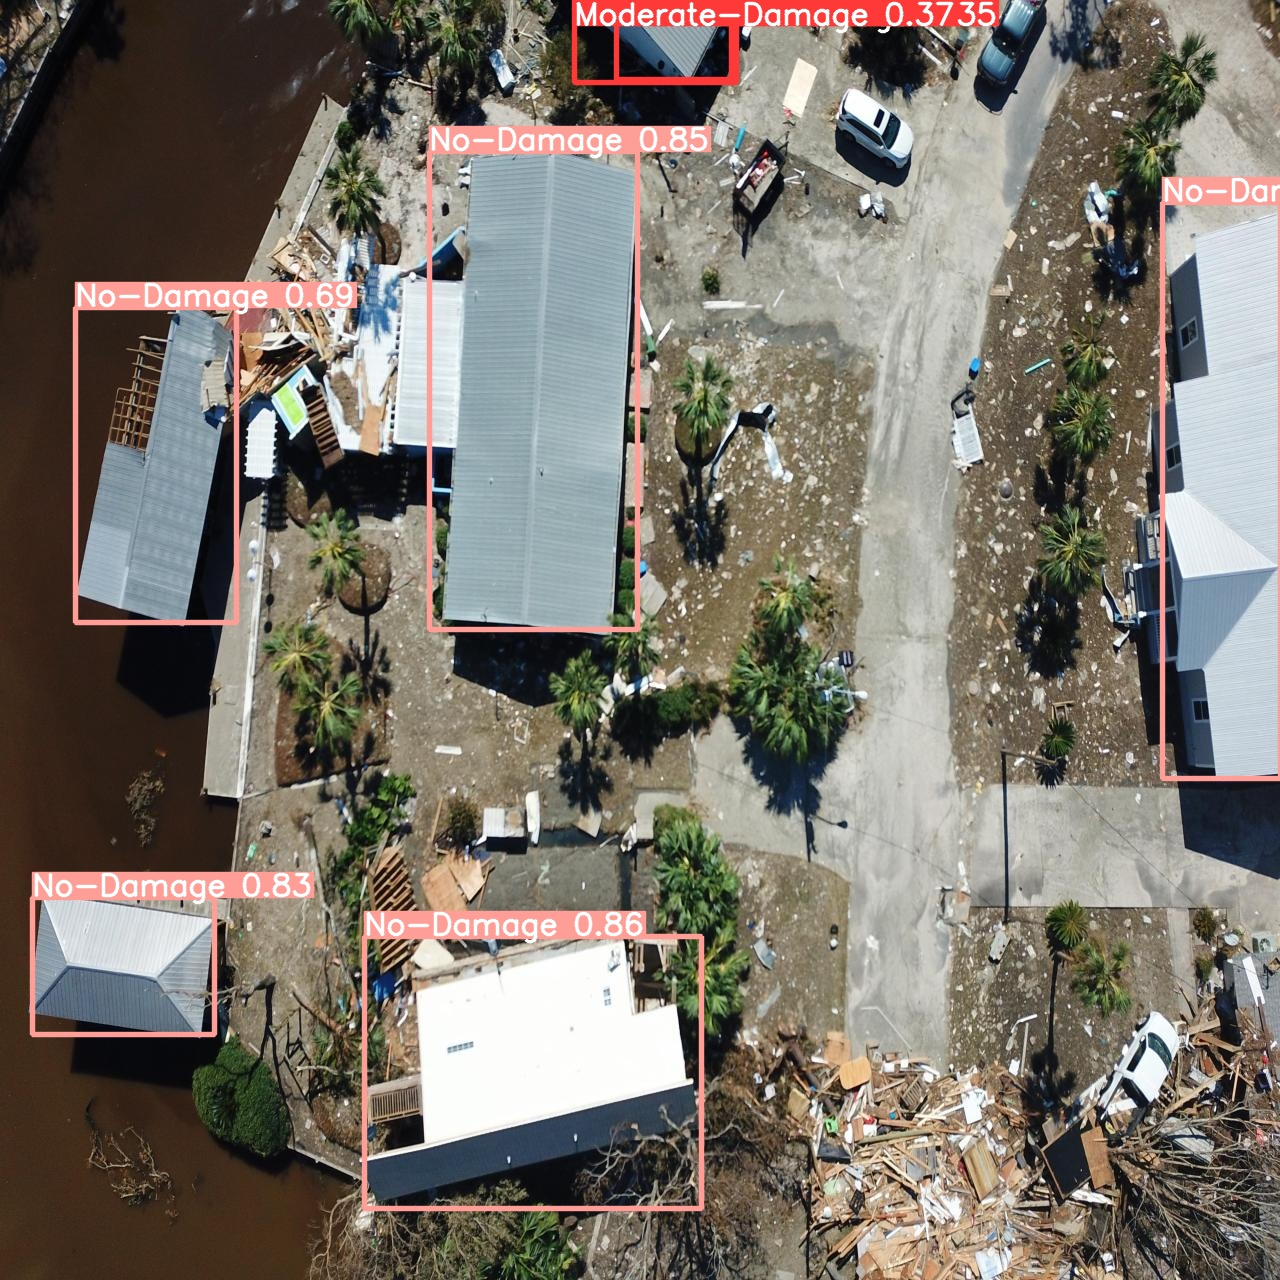

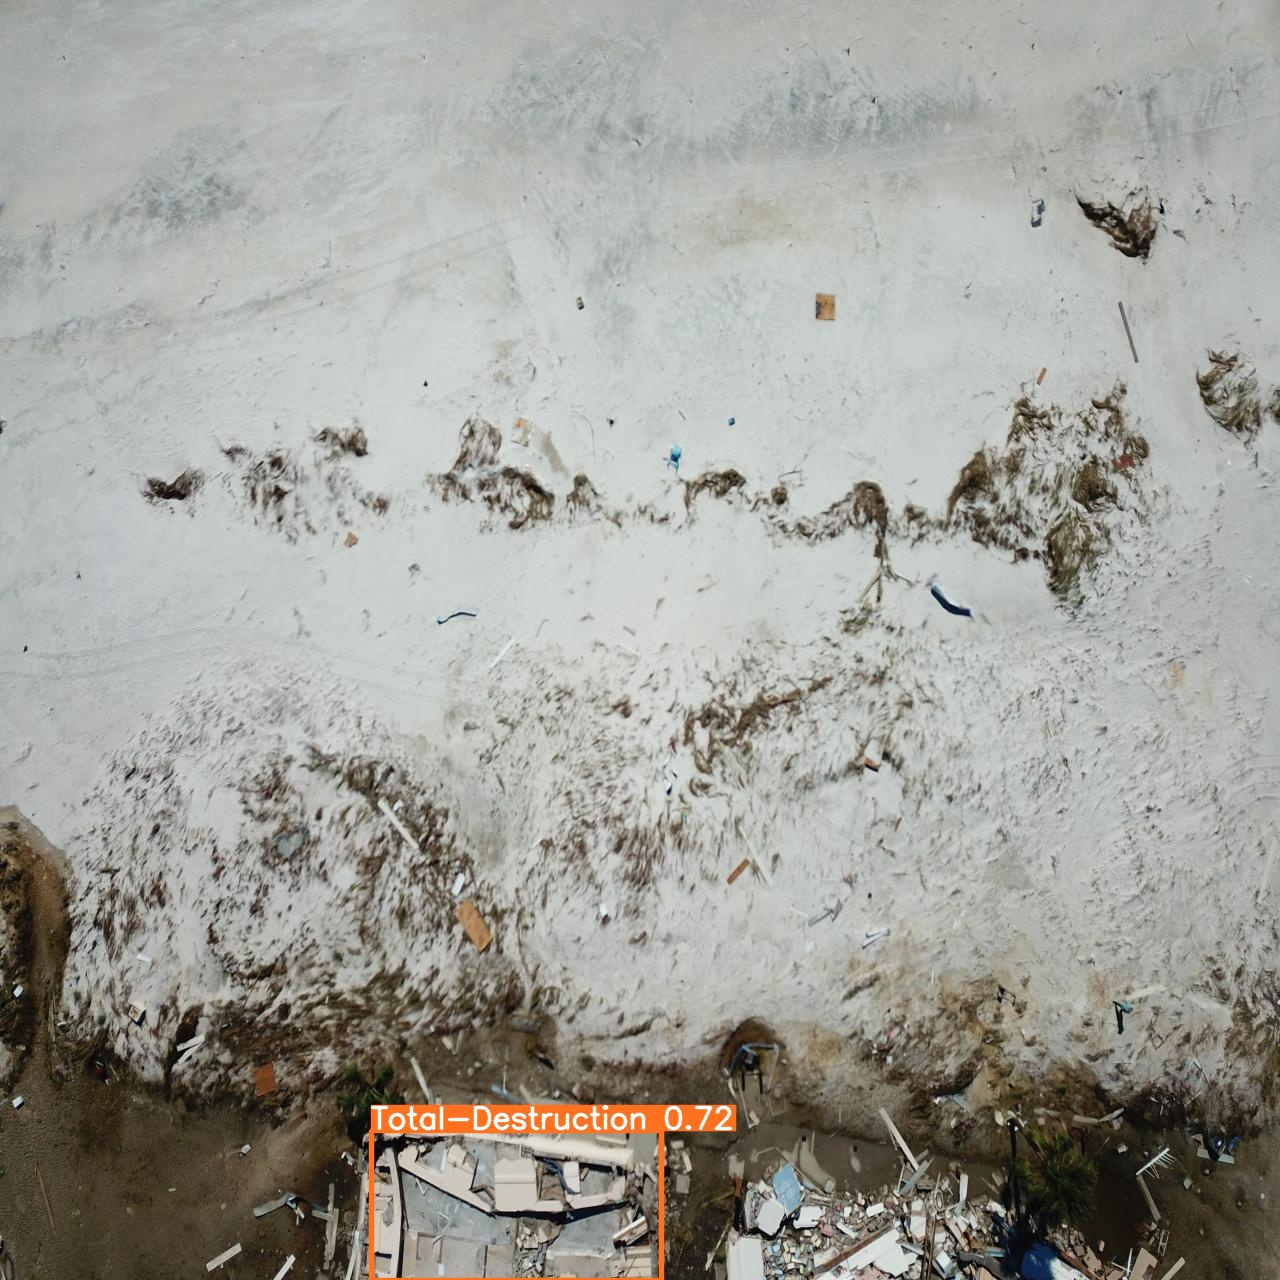

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/film.mp4 save=True

/content
2023-04-04 12:47:18.062884: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 12:47:19.037775: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/1351) /content/film.mp4: 384x640 64.9ms
video 1/1 (2/1351) /content/film.mp4: 384x640 11.0ms
video 1/1 (3/1351) /content/film.mp4: 384x640 11.0ms
video 1/1 (4/1351) /content/film.mp4: 384x640 11.0ms
video 1/1 (5/1351) /content/film.mp4: 384x640 11.0ms
video 1/1 (6/1351) /content/film.mp4: 384x640 11.0ms
video 1/1 (7/1351) /content/film.mp4: 384x640 11.0ms
video 1/1

In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/film3.mp4 save=True

/content
2023-04-04 13:16:08.133476: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 13:16:09.150346: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/2347) /content/film3.mp4: 384x640 1 Moderate-Damage, 116.7ms
video 1/1 (2/2347) /content/film3.mp4: 384x640 1 Moderate-Damage, 11.1ms
video 1/1 (3/2347) /content/film3.mp4: 384x640 1 Moderate-Damage, 11.1ms
video 1/1 (4/2347) /content/film3.mp4: 384x640 1 Moderate-Damage, 13.6ms
video 1/1 (5/2347) /content/film3.mp4: 384x640 1 Moderate-Damage, 11.3ms
video 1/1 (6/2

In [22]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True 

/content
100% 49.7M/49.7M [00:03<00:00, 16.5MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/RescueNet-YOLO8-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras